In [1]:
from fastai.vision import *     #The fastai library is a deep learning library built on top of PyTorch that provides high-level abstractions for training and deploying deep learning models. 

In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential

# downloading images from google:
#Copy paste this javascript code in web console

#To open web console in Google chrome ctrl+shift+j

```javascript
function simulateRightClick( element ) {
    var event1 = new MouseEvent( 'mousedown', {
        bubbles: true,
        cancelable: false,
        view: window,
        button: 2,
        buttons: 2,
        clientX: element.getBoundingClientRect().x,
        clientY: element.getBoundingClientRect().y
    } );
    element.dispatchEvent( event1 );
    var event2 = new MouseEvent( 'mouseup', {
        bubbles: true,
        cancelable: false,
        view: window,
        button: 2,
        buttons: 0,
        clientX: element.getBoundingClientRect().x,
        clientY: element.getBoundingClientRect().y
    } );
    element.dispatchEvent( event2 );
    var event3 = new MouseEvent( 'contextmenu', {
        bubbles: true,
        cancelable: false,
        view: window,
        button: 2,
        buttons: 0,
        clientX: element.getBoundingClientRect().x,
        clientY: element.getBoundingClientRect().y
    } );
    element.dispatchEvent( event3 );
}

function getURLParam( queryString, key ) {
    var vars = queryString.replace( /^\?/, '' ).split( '&' );
    for ( let i = 0; i < vars.length; i++ ) {
        let pair = vars[ i ].split( '=' );
        if ( pair[0] == key ) {
            return pair[1];
        }
    }
    return false;
}

function createDownload( contents ) {
    var hiddenElement = document.createElement( 'a' );
    hiddenElement.href = 'data:attachment/text,' + encodeURI( contents );
    hiddenElement.target = '_blank';
    hiddenElement.download = 'cats.txt';
    hiddenElement.click();
}

function grabUrls() {
    var urls = [];
    return new Promise( function( resolve, reject ) {
        var count = document.querySelectorAll(
        	'.isv-r a:first-of-type' ).length,
            index = 0;
        Array.prototype.forEach.call( document.querySelectorAll(
        	'.isv-r a:first-of-type' ), function( element ) {
            // using the right click menu Google will generate the
            // full-size URL; won't work in Internet Explorer
            // (http://pyimg.co/byukr)
            simulateRightClick( element.querySelector( ':scope img' ) );
            // Wait for it to appear on the <a> element
            var interval = setInterval( function() {
                if ( element.href.trim() !== '' ) {
                    clearInterval( interval );
                    // extract the full-size version of the image
                    let googleUrl = element.href.replace( /.*(\?)/, '$1' ),
                        fullImageUrl = decodeURIComponent(
                        	getURLParam( googleUrl, 'imgurl' ) );
                    if ( fullImageUrl !== 'false' ) {
                        urls.push( fullImageUrl );
                    }
                    // sometimes the URL returns a "false" string and
                    // we still want to count those so our Promise
                    // resolves
                    index++;
                    if ( index == ( count - 1 ) ) {
                        resolve( urls );
                    }
                }
            }, 10 );
        } );
    } );
}

grabUrls().then( function( urls ) {
    urls = urls.join( '\n' );
    createDownload( urls );
} );

```

In [11]:
# downloading images of cat
from pathlib import Path

folder = 'cat'

path = Path('dog_vs_cat')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)



In [33]:
import requests
import os
import urllib.parse
from PIL import Image

def download_images_from_file(file_path, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Read the URLs from the file
    with open(file_path, 'r') as file:
        urls = file.readlines()

    # Download images from each URL
    for url in urls:
        url = url.strip()  # Remove any leading/trailing whitespace or newline characters

        # Extract the filename from the URL
        filename = url.split('/')[-1]

        try:
            # Make a request to download the image
            response = requests.get(url)
            response.raise_for_status()

            # Save the image to the destination folder
            image_path = os.path.join(destination_folder, filename)
            with open(image_path, 'wb') as image_file:
                image_file.write(response.content)

            # Open the image to verify its validity
            with Image.open(image_path) as image:
                pass  # Do nothing if the image is successfully opened

            print(f"Downloaded: {filename}")

        except Exception as e:
            print(f"Failed to download: {filename}")
            print(f"Error: {str(e)}")


In [23]:
download_images_from_file('cats.txt', dest)

Downloaded: NationalGeographic_2572187_square.jpg
Downloaded: Himalayan-chocolate-point.jpg
Downloaded: Cat_August_2010-4.jpg
Downloaded: image
Downloaded: NationalGeographic_2572187_2x3.jpg
Downloaded: Cat_November_2010-1a.jpg
Downloaded: original.jpg
Downloaded: 220805-domestic-cat-mjf-1540-382ba2.jpg
Downloaded: Cat.jpg
Downloaded: 00tb-cats1-mediumSquareAt3X.jpg
Downloaded: p07ryyyj.jpg
Downloaded: original.jpg
Downloaded: 1754.jpg
Downloaded: 32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg
Downloaded: maxresdefault.jpg
Downloaded: black-cat-back.jpg
Downloaded: gettyimages-1279899488_wide-f3860ceb0ef19643c335cb34df3fa1de166e2761-s1100-c50.jpg
Downloaded: cats-that-look-like-tigers-leopards-and-cheetahs.png
Downloaded: all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg
Downloaded: cat_1659882617172_1659882628989_1659882628989.jpg
Downloaded: 230426143017-sand-cat-card.jpg
Downloaded: Thinking-of-getting-a-cat.png
Downloaded: FELV-cat.jpg
Downloaded: cats-that-look

ConnectTimeout: HTTPSConnectionPool(host='www.thurstontalk.com', port=443): Max retries exceeded with url: /wp-content/uploads/2022/11/joint-animal-services-community-cat-program.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002153579DF60>, 'Connection to www.thurstontalk.com timed out. (connect timeout=None)'))

In [24]:
# downloading images of dog:

from pathlib import Path

folder = 'dog'

path = Path('dog_vs_cat')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)



In [25]:
download_images_from_file('dogs.txt', dest)

Downloaded: dog-puppy-on-garden-royalty-free-image-1586966191.jpg
Downloaded: German-shepherd.jpg
Downloaded: small-fuffy-dog-breeds-1623362663.jpg
Downloaded: domestic-dog_thumb_16x9.jpg
Downloaded: beagle-hound-dog.jpg
Downloaded: golden-retriever-puppy.jpg
Downloaded: small-dog-owners-1.jpg
Downloaded: cute-dog-headshot.jpg
Downloaded: German-Shepherd-dog-Alsatian.jpg
Downloaded: smallest-dog-breeds-toy-poodle.jpg
Downloaded: istock_000002860901small-0e58429bef7fa7d052df8dfefedff1f78f3d3fa2-s1100-c50.jpg
Downloaded: golden-retriever-royalty-free-image-506756303-1560962726.jpg
Downloaded: %2Fmethode%2Ftimes%2Fprod%2Fweb%2Fbin%2Fc47f6830-9292-11ed-b04f-b9bf191ef388.jpg
Downloaded: 220128-chihuahua-mb-0853-a252ab.jpg
Downloaded: chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg
Downloaded: wolf-dog-breeds-siberian-husky-1570411330.jpg
Downloaded: 4200.jpg
Downloaded: white-dog-breeds-4846529-hero-4bf084c93c5b45a292e30559bb7e50e8.jpg
Downloaded: GettyImages-1205998407

SSLError: HTTPSConnectionPool(host='www.nylabone.com', port=443): Max retries exceeded with url: /-/media/project/oneweb/nylabone/images/dog101/activities-fun/10-great-small-dog-breeds/maltese-portrait.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))

## Preparing the dataset

In [5]:
TRAINING_DIR = 'dog_vs_cat/'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2)



train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(64,64),
    batch_size=64,
    shuffle=True,
	class_mode='categorical',
    subset='training'
)

validation_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(64,64),
	class_mode='categorical',
    subset='validation'
)


Found 133 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


## Creating the model

In [13]:
model = Sequential([tf.keras.layers.Flatten()])
#model.add(Flatten(input_shape=(3,64,64)))

model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=256,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=128,activation="relu"))
#model.add(Dropout(0.4))

model.add(Dense(units=64,activation="relu"))
#model.add(Dropout(0.2))

model.add(Dense(units=32,activation="relu"))
#model.add(Dropout(0.3))

model.add(Dense(units=16,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=8,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=2,activation="softmax"))

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(train_generator, epochs=15, validation_data=validation_generator, verbose=1)

Epoch 1/15
3/3 [==============================] - 10s 3s/step - loss: 1.6796 - accuracy: 0.6541 - val_loss: 1.0598 - val_accuracy: 0.3333
Epoch 2/15
3/3 [==============================] - 6s 2s/step - loss: 1.3652 - accuracy: 0.3534 - val_loss: 0.6702 - val_accuracy: 0.6667
Epoch 3/15
3/3 [==============================] - 6s 2s/step - loss: 0.8388 - accuracy: 0.4962 - val_loss: 0.7261 - val_accuracy: 0.3636
Epoch 4/15
3/3 [==============================] - 6s 3s/step - loss: 0.8163 - accuracy: 0.4436 - val_loss: 0.7213 - val_accuracy: 0.3333
Epoch 5/15
3/3 [==============================] - 6s 3s/step - loss: 0.9510 - accuracy: 0.4511 - val_loss: 0.7442 - val_accuracy: 0.3333
Epoch 6/15
3/3 [==============================] - 6s 2s/step - loss: 0.9541 - accuracy: 0.4962 - val_loss: 0.7378 - val_accuracy: 0.3333
Epoch 7/15
3/3 [==============================] - 6s 3s/step - loss: 0.9628 - accuracy: 0.4211 - val_loss: 0.7357 - val_accuracy: 0.3333
Epoch 8/15
3/3 [========================

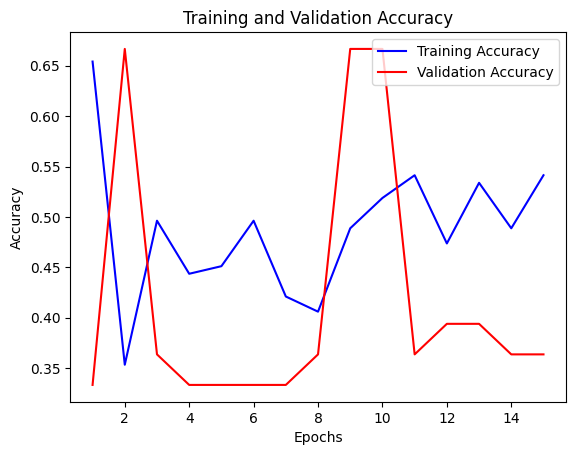

In [9]:
import matplotlib.pyplot as plt

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a line plot of the training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


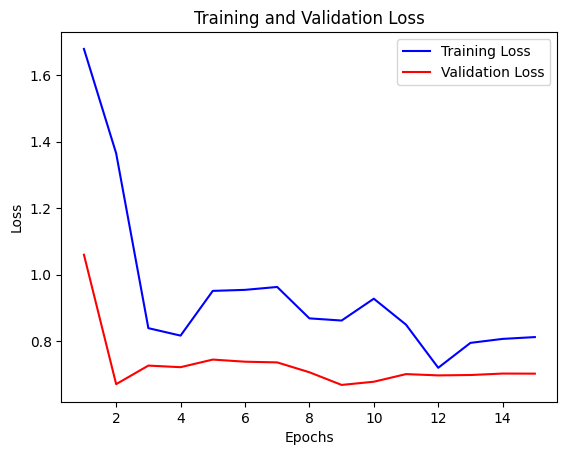

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
model = model

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the input image
img = image.load_img('dog.jpg', target_size=(image_width, image_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize pixel values between 0 and 1

# Make predictions on the preprocessed image
predictions = model.predict(img_array)


1/1 [==============================] - 1s 1s/step


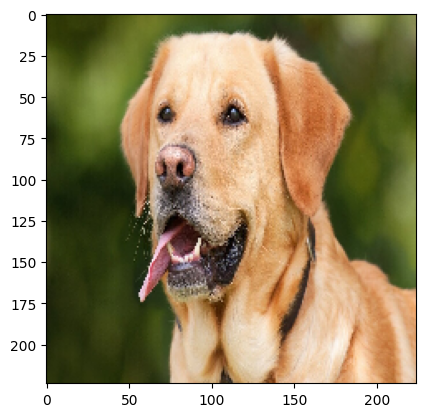

In [25]:
plt.imshow(img)

In [19]:
class_names = ['cat', 'dog']

predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
confidence = predictions[0][predicted_class_index] * 100

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")


Predicted class: dog
Confidence: 62.00%


In [26]:
# Here, The confidence(accuracy) can be increased by training on more epochs(increasing the number of epochs)

Using CNN

In [20]:
model = tf.keras.models.Sequential([
   
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [12]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'],)

history = model.fit_generator(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)




C:\Users\nipan\AppData\Local\Temp\ipykernel_15288\4095119751.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)


Epoch 1/15
3/3 [==============================] - 9s 3s/step - loss: 0.6806 - accuracy: 0.6241 - val_loss: 0.6785 - val_accuracy: 0.6667
Epoch 2/15
3/3 [==============================] - 6s 2s/step - loss: 0.6756 - accuracy: 0.6541 - val_loss: 0.6764 - val_accuracy: 0.6667
Epoch 3/15
3/3 [==============================] - 6s 2s/step - loss: 0.6744 - accuracy: 0.6541 - val_loss: 0.6717 - val_accuracy: 0.6667
Epoch 4/15
3/3 [==============================] - 7s 2s/step - loss: 0.6775 - accuracy: 0.6090 - val_loss: 0.6710 - val_accuracy: 0.6667
Epoch 5/15
3/3 [==============================] - 6s 3s/step - loss: 0.6719 - accuracy: 0.6617 - val_loss: 0.6666 - val_accuracy: 0.6667
Epoch 6/15
3/3 [==============================] - 6s 3s/step - loss: 0.6698 - accuracy: 0.6617 - val_loss: 0.6648 - val_accuracy: 0.6667
Epoch 7/15
3/3 [==============================] - 6s 1s/step - loss: 0.6704 - accuracy: 0.6466 - val_loss: 0.6630 - val_accuracy: 0.6667
Epoch 8/15
3/3 [=========================

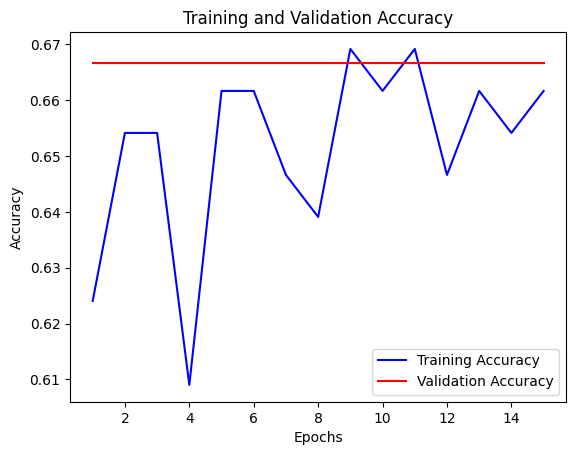

In [23]:
import matplotlib.pyplot as plt

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a line plot of the training and validation accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


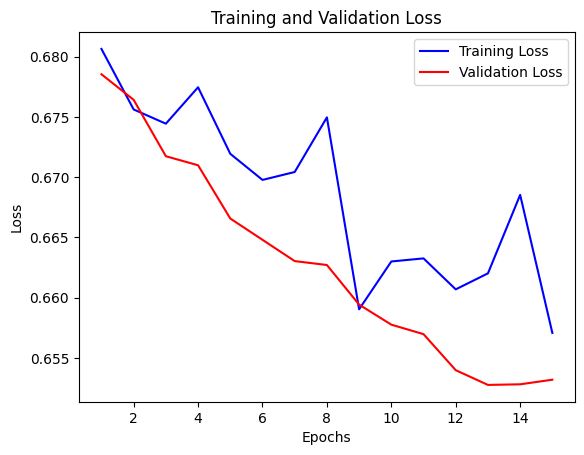

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
